# Mecánica Celeste
## 2023-2
## Set de Problemas No 1: Problema de N-cuerpos

**1. Conceptos I.**
> ¿Qué es una fuerza conservativa? De ejemplos de fuerzas conservativas y no conservativas, y analice cómo afectan ambos tipos de fuerza a los sistemas físicos.

> Demuestre por cualquier método que la fuerza de gravedad es una fuerza conservativa.

**Solución.**

El nombre de "fuerza conservativa" proviene de la propiedad de estas fuerzas de conservar la energía mecánica total de un sistema mientras realizan trabajo. En pocas palabras, cuando una fuerza conservativa realiza trabajo sobre un objeto, la suma de la energía cinética y la energía potencial del sistema se mantiene constante.

Algunos tipos de estas fuerzas son la fuerza electrica, gravitacional o elástica; mientras que los tipos de fuerzas no conservativas son la fuerza magnetica o el rozamiento.

Por definición, una fuerza que es conservativa está asociada a un potencial (en este caso potencial gravitacional).

$$\vec{F_G}=\vec{\nabla} \phi$$

Si la fuerza es conservativa, el trabajo realizado no depende de la trayectoria y en el caso en que se realice una trayectoria cerrada no hay cambio en la energía.

$$W=\oint\vec{F}\cdot d\vec{r}= \int_a^b\vec{F}\cdot d\vec{r} +\int_b^a\vec{F}\cdot d\vec{r} =\int_a^b\vec{\nabla} \phi\cdot d\vec{r}+\int_b^a\vec{\nabla} \phi\cdot d\vec{r}\\=\int_a^bd\phi+\int_b^ad\phi=(\phi(b)-\phi(a))+(\phi(a)-\phi(b))=0$$

**2. Conceptos II.** Dado un sistema de dos cuerpos con posiciones $\vec{r}_1$ y $\vec{r}_2$ respecto a un sistema de referencia con origen $\mathcal{O}$, cuyo centro  de masa se encuentra en $\vec{R}$ (ver Figura 1), demuestre que el vector de momentum angular total en el sistema de referencia de laboratorio es igual a la suma del momentum angular del centro de masa más el momentum de un cuerpo de masa $m_r = m_1m_2/(m_1+m_2)$ con respecto a un sistema de referencia con origen en el centro de masa. Es decir
  
  \begin{equation}
  \displaystyle \vec{L} = M\vec{R}\times \dot{\vec{R}} + m_r \vec{r}\times \dot{\vec{r}}
  \end{equation}
  
  donde, de acuerdo con la Figura 1, $\vec{r} = \vec{r}_{2c} - \vec{r}_{1c}$.


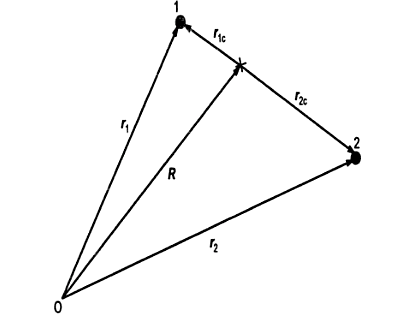
 Figura 1.

**Solución.** *Solo se muestran resultados importantes, no todo el desarrollo

El momentum angular se define mediante $\vec{L}=\vec{r}\times m\dot{\vec{r}}$

El momentum angular total del sistema es entonces la suma de los momentums angulares de cada cuerpo.

$$\vec{L}=m_1(\vec{r_1}\times\dot{\vec{r_1}})+m_2(\vec{r_2}\times\dot{\vec{r_2}})\tag{1}$$

La posición del centro de masa se puede pensar como un promedio ponderado de las posiciones de cada cuerpo con $M=m_1+m_2$.

$$\vec{R}=\frac{m_1\vec{r_1} + m_2\vec{r_2}}{M}\tag{*}$$

El vector que une a los dos cuerpos equivale a

$$\vec{r}=\vec{r_2} - \vec{r_1}\tag{**}$$

Despejando $\vec{r_1}$ y $\vec{r_2}$ de $(*)$ y sustituyendo en $(**)$ e introduciendo la masa reducida $m_r=\frac{m_1m_2}{M}$ podemos realizar una reescritura de cada uno de los vectores de la siguiente forma:

$$\vec{r_1}=\vec{R}+\frac{m_r}{m_1}\vec{r}\hspace{1cm}\vec{r_2}=\vec{R}-\frac{m_r}{m_2}\vec{r}\tag{2}$$

Los vectores pueden ser diferenciados de forma lineal...

$$\dot{\vec{r_1}}=\dot{\vec{R}}+\frac{m_r}{m_1}\dot{\vec{r}}\hspace{1cm}\dot{\vec{r_2}}=\dot{\vec{R}}-\frac{m_r}{m_2}\dot{\vec{r}}\tag{3}$$

Reemplazando $(2)$ y $(3)$ en $(1)$

$$\vec{L}=\bigg[m_1\bigg(\vec{R}+\frac{m_r}{m_1}\vec{r}\bigg)\times \bigg(\dot{\vec{R}}+\frac{m_r}{m_1}\dot{\vec{r}}\bigg)\bigg] + \bigg[m_2\bigg(\vec{R}-\frac{m_r}{m_2}\vec{r}\bigg)\times \bigg(\dot{\vec{R}}-\frac{m_r}{m_2}\dot{\vec{r}}\bigg)\bigg]\\=$$

Solucionando un poco la anterior expresión (no se muestra lo extensa del algebra) se prueba que...

$$\vec{L}=(m_1\vec{R}\times\dot{\vec{R}}) + (m_2\vec{R}\times\dot{\vec{R}}) + m_r^2\bigg(\frac{1}{m_1} + \frac{1}{m_2}\bigg)(\vec{r}\times\dot{\vec{r}})$$

$$\vec{L} = M\vec{R}\times \dot{\vec{R}} + m_r \vec{r}\times \dot{\vec{r}}$$



**3. Graficando el sistema solar.** Utilice Astroquery para consultar las posiciones de los planetas y planetas enanos del sistema solar para diferentes fechas, tal que alcance a completar al menos una órbita de cada cuerpo. Realice un gráfico en 3 dimensiones que muestra las órbitas de cada uno, con su respectiva etiqueta.

In [1]:
!pip install -q pymcel

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 9.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 21.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 888.9/888.9 kB 27.7 MB/s eta 0:00:00


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from astroquery.jplhorizons import Horizons
from astropy import constants
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import spiceypy as spice
import pymcel as mc

In [ ]:
planets_id = np.array([i for i in range (199,1000,100)] + [2000001, 136199, 136472, 136108])
planets = np.array(["Mercurio", "Venus", "Tierra", "Marte", "Jupiter", "Saturno", "Urano", "Neptuno", "Pluton", "Ceres", "Eris", "Makemake", "Haumea"])

#Periodo orbital de los planetas en años
T_planets = np.array([0.2408467, 0.61519726, 1.0000174, 1.8808476, 11.862615, 29.447498, 84.016846, 164.79132, 247.92065, 4.61, 557.56, 307.54, 284.81])

In [ ]:
#Funcion que calcula la fecha de stop en la que termina una orbita cada planeta
from datetime import datetime, timedelta

def calcular_fechas(años_array):
  fecha_inicio = datetime(1800, 1, 1, 0, 0, 0) #Todos toman igual fecha inicial
  fechas_fin = []

  for años in años_array:
    desplazamiento = timedelta(days= años * 365.25)
    fecha_fin = fecha_inicio + desplazamiento
    fechas_fin.append(fecha_fin.strftime('%Y-%m-%d'))

  return fechas_fin

#Se aplica sobre todos los planetas para conocer el fin de su orbita
fecha_stop = calcular_fechas(T_planets)

In [ ]:
#Funcion que calcula los vectores posicion de cada planeta para su respectivo tiempo orbital
def consultar_vectores(ids):
  resultados = []

  for id_, fecha_stop, step in ids:
    objeto = Horizons(id=id_, location='@0', epochs={'start':'1800-01-01', 'stop':fecha_stop, 'step': str(round(step)) + "d"}).vectors().to_pandas()
    r_objeto = np.array(objeto[["x","y","z"]]*constants.au.value)
    resultados.append(r_objeto)

  return np.array(resultados)

#Se toma el tamaño del step de modo que represente 1° de arco recorrido en su orbita
zip_planets =list(zip(planets_id, fecha_stop, T_planets*365.25/360 + 0.5))
r_planets = consultar_vectores(zip_planets)

<ipython-input-21-74e50507629b>:10: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(resultados)


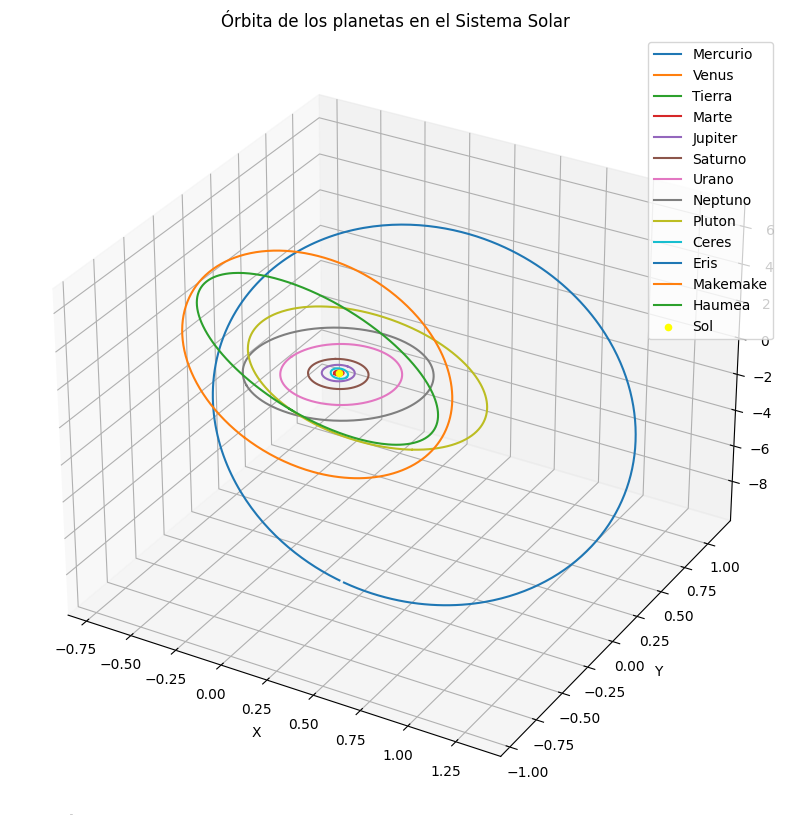

In [ ]:
#Grafico de las orbitas
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')
for i in range(len(planets)):
  ax.plot(r_planets[i][:,0], r_planets[i][:,1], r_planets[i][:,2], label=planets[i])

ax.scatter([0], [0], [0], color='yellow', label='Sol', marker='o')
ax.set_title('Órbita de los planetas en el Sistema Solar')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.legend()
ax.grid(True)
plt.axis("equal")
plt.show()

**4. Las constantes del Sistema Solar.** Elija una fecha inicial para la cual va a obtener los datos de los 8 planetas del Sistema Solar (Puede utilizar SPICE para la solución de éste ejercicio).

1. Calcule la energía total del sistema formado por los 8 planetas y el Sol en Joules.  ¿Es positiva o negativa?.  Compare el orden de magnitud esa energía con el orden de magnitud de magnitud la energía cinética del planeta Júpiter.

2. Calcule la misma cantidad para un período de tiempo de 100 años (por ejemplo todo el siglo xx) en intervalos de entre 1 y 5 años.  Haga un gráfico de la energía como función del tiempo y muestre que el valor de esa cantidad es aproximadamente "constante", como lo predice la teoría.

3. Calcule el momentum angular total del sistema solar en la fecha del punto 1.  Recuerde que este vector define la normal al plano invariable de Laplace del sistema solar.  Repita el cálculo 100 años después y calcule el ángulo en el que el vector cambio. \
Ayuda: el ángulo entre dos vectores se calcula usando la propiedad del producto punto A⋅ B = A B cos θ.

4. Encuentre la inclinación del plano orbital de la Tierra respecto al plano invariable de Laplace del sistema solar calculado en 3 en la fecha inicial. \
Ayuda: el ángulo entre el plano de la órbita de la Tierra y el plano invariable de Laplace es igual al ángulo entre el vector momentum angular de la Tierra y el vector momentum angular total del sistema solar.

5. Repetir lo anterior con todos los planetas del sistema solar ¿cuál es el planeta que presenta la mayor inclinación? ¿cuál es el planeta que presenta la menor inclinación?


In [ ]:
planets_id = np.array([10] + [i for i in range (199,900,100)])
planets = np.array(["Sol","Mercurio", "Venus", "Tierra", "Marte", "Jupiter", "Saturno", "Urano", "Neptuno"])

In [ ]:
def consultar_vectores(ids, step_):
  resultados_r = []
  resultados_v = []

  for id_ in ids:
    objeto = Horizons(id=id_, location='@0', epochs={'start':'1900-01-01', 'stop':'1999-01-01', 'step': step_}).vectors().to_pandas() #Approx 3 months = 90 days
    r_objeto = np.array(objeto[['x', 'y', 'z']])*constants.au.value
    v_objeto = np.array(objeto[['vx', 'vy', 'vz']])*constants.au.value/86400
    resultados_r.append(r_objeto)
    resultados_v.append(v_objeto)

  return np.array(resultados_r), np.array(resultados_v)

In [ ]:
r_planets, v_planets = consultar_vectores(planets_id, '1y')

In [ ]:
!wget https://naif.jpl.nasa.gov/pub/naif/generic_kernels/pck/gm_de440.tpc #Kernel de Spice

--2023-08-28 20:39:37--  https://naif.jpl.nasa.gov/pub/naif/generic_kernels/pck/gm_de440.tpc
Resolving naif.jpl.nasa.gov (naif.jpl.nasa.gov)... 137.78.232.95
Connecting to naif.jpl.nasa.gov (naif.jpl.nasa.gov)|137.78.232.95|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 12708 (12K) [text/plain]
Saving to: ‘gm_de440.tpc’

gm_de440.tpc        100%[===================>]  12.41K  --.-KB/s    in 0s      

2023-08-28 20:39:37 (176 MB/s) - ‘gm_de440.tpc’ saved [12708/12708]



In [ ]:
#Datos de Spice
spice.furnsh('gm_de440.tpc')
m_planets = np.zeros(9)

for i in range(9):
  m_planets[i] = spice.bodvrd(f"{planets_id[i]}","GM",1)[1][0] *1e9/constants.G.value

In [ ]:
def energias(m, r, v):
  P = []
  L = []
  K = []

  for i in range(len(m)): #Momentum Lineal, Angular y Energia Cinetica
    P.append(m[i]*v[i])
    L.append(np.cross(r[i], P[i], axis = 1))
    K.append(0.5*m[i]*(np.linalg.norm(v[i], axis = 1)**2))

  K = np.array(K)
  P = np.array(P)
  L = np.array(L)

  U = 0
  for i in range(len(m)): #Energia potencial
      for j in range(len(m)):
        if j != i:
          r_ij = np.linalg.norm(r[i]-r[j], axis = 1)
          mu_j = constants.G.value*m[j]
          U += m[i]*mu_j/r_ij
  U *= -0.5
  return P, L, K, U

In [ ]:
P_planets, L_planets, K_planets, U_sistem = energias(m_planets, r_planets, v_planets)

#**4.1**

In [ ]:
#En Joules
pd.DataFrame([np.sum(K_planets[:, 0]) + np.sum(U_sistem[0]), K_planets[5][0]], index = ["U Total", "K_planets Jupiter"], columns = ["1900-01-01"])

,1900-01-01
U Total,-1.980403e+35
K_planets Jupiter,1.506371e+35


In [ ]:
print("La Energía Potencial tiene signo negativo. En principio esto indica que el sistema está ligado gravitacionalmente y puede ser estable")
print(f"La Energía Total del sistema, para la fecha 1900-01-01, es de {(np.sum(K_planets[:, 0]) + np.sum(U_sistem[0]))/K_planets[5][0]} veces en comparación con la Energía Cinética de Jupiter")

La Energía Potencial tiene signo negativo. En principio esto indica que el sistema está ligado gravitacionalmente y puede ser estable
La Energía Total del sistema, para la fecha 1900-01-01, es de -1.314684640697842 veces en comparación con la Energía Cinética de Jupiter


#**4.2**

Text(0, 0.5, 'E ( Joules )')

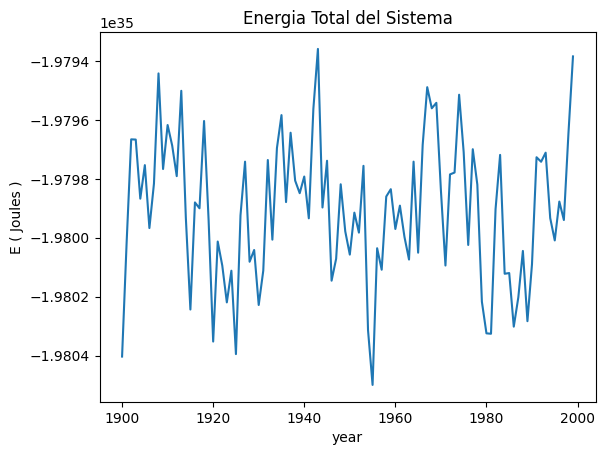

In [ ]:
t_list = np.arange(1900,2000)

#Normalización respecto a la energía cinética del Sol
plt.plot(t_list, np.sum(K_planets, axis = 0) + U_sistem)
plt.title("Energia Total del Sistema")
plt.xlabel("year")
plt.ylabel("E ( Joules )")

#**4.3**

In [ ]:
L_laplace = np.sum(L_planets[:,0], axis = 0)
L_100_year = np.sum(L_planets[:,-1], axis = 0)
theta_100 = np.rad2deg(np.arccos(np.dot(L_laplace, L_100_year)/(np.linalg.norm(L_laplace)*np.linalg.norm(L_100_year))))
inclinacion = np.zeros(9)
for i in range(9):
  theta = np.rad2deg(np.arccos(np.dot(L_laplace, L_planets[i][0])/(np.linalg.norm(L_laplace)*np.linalg.norm(L_planets[i][0]))))
  inclinacion[i] = theta

In [ ]:
pd.DataFrame([L_laplace, L_100_year], index = ["1900-01-01", "1999-01-01"], columns = ["Lx Total", "Ly Total", "Lz Total"])

,Lx Total,Ly Total,Lz Total
1900-01-01,8.219980e+41,2.606104e+41,3.130283e+43
1999-01-01,8.223449e+41,2.609306e+41,3.130962e+43


In [ ]:
print(f"La inclinación entre el momentum angular total inicial y final es {theta_100}°")

La inclinación entre el momentum angular total inicial y final es 0.0005722200913513239°


In [ ]:
pd.DataFrame(inclinacion, index = planets, columns = ["Theta (°)"])

,Theta (°)
Sol,0.282940
Mercurio,6.329983
Venus,2.190560
Tierra,1.583991
Marte,1.682296
Jupiter,0.327873
Saturno,0.931688
Urano,1.026152
Neptuno,0.727201




---



**5. Problema de 3 cuerpos II.** Considere tres cuerpos $m_1$, $m_2$ y $m_3$, tal que $m_1 > m_2 >> m_3$, los cuales interactuan gravitacionalmente. En un instante $t_0=0$ las masas están ubicadas en los vértices de un trángulo equilatero de lado $d$.

> Encuentre la dirección y la magnitud de la fuerza que experimenta la masa $m_3$ en el instante $t_0$.

> Asigne valores a las cantidades $m_1$, $m_2$, $m_3$ y $d$, de forma que tengan algun sentido físico.

> Cree un sistema de unidades canónico con base en estos valores.

> Simule el movimiento del sistema usando diferentes vectores de velocidad en el instante $t_0$ y diferentes valores para $m_1$, $m_2$ y $m_3$. Trate de conseguir un sistema estable. ¿Qué observa?


Siendo $m_3$ despreciable respecto a $m_1$ y $m_2$, la unidad de masa se establece como $[M]=m_1 + m_2$.

La unidad de longitud se define como la distancia que separa a los dos cuerpos masivos $[L]=d$

Para lograr un valor de $G=1$ se debe calcular la respectiva unidad de tiempo.

$$G\frac{[M][T]^2}{[L]^3}=1\to [T]=\sqrt{\frac{[L]^3}{G[M]}}$$

$$m_1=1M_\oplus=5.972\times 10^{24}kg \hspace{1cm} m_2=1M_{moon}=7.349 \times 10^{22} kg\hspace{1cm}d=384.4\times 10^6 m$$

$$[M]=6.04549\times 10^24 kg \hspace{1cm} [L]=384.4\times 10^6 m \hspace{1cm} [T]=375195.0532s=4.3425d$$

Esta unidad de *Tiempo* representa la cantidad de tiempo que se requiere para realizar una orbita que barra un angulo igual a $1rad$

En este sistema de unidades, las nuevas masas son entonces

$$m_1 = 0.9878 \hspace{1cm} m_2=0.01216$$

La masa del tercer cuerpo, $m_3$ será la masa de un cohete *Saturno V* de alrededor de *3000* toneladas. La masa de este cuerpo en el nuevo sistema es

$$m_3=5\times 10^{-19}$$

Si el origen de nuestro sistema concuerda con el centro de masa, haremos que las posiciones iniciales de las masas sean solamente sobre el eje $x$; entonces las posiciones de nuestros cuerpos son

$$\vec{r_1}=m_2\hat{x}$$

$$\vec{r_2}=-m_1\hat{x}$$

Para que el tercer cuerpo se encuentre en el otro vertice del triangulo, podemos colocar su posición sobre el plano $xy$. Su posición es

$$\vec{r_3}=(m1-0.5)\hat{x}+\cos\bigg(\frac{\pi}{6}\bigg)\hat{y}$$

In [ ]:
1#Masas
m_tierra = 5.972e24 #Kg
m_luna = 7.349e22 #Kg
unidad_masa = m_tierra + m_luna
m1 = m_tierra/unidad_masa
m2 = m_luna/unidad_masa
m3 = 5e-19

#Distancia
d = 3.844e8 #Metros

#Tiempo
G = 6.67428e-11
unidad_tiempo = np.sqrt((d**3)/(G*unidad_masa))

#Posiciones
r1 = np.array([-m2,0, 0])
r2 = np.array([m1,0, 0])
r3 = np.array([m1-0.5,np.cos(np.pi/6), 0])

#Fuerzas y direccion
f31 = m1*m3*(r1 - r3)/np.linalg.norm(r1-r3)**3
f32 = m2*m3*(r2 - r3)/np.linalg.norm(r2-r3)**3
f_total = f31 + f32

In [ ]:
pd.DataFrame((f31, f32, f_total), columns = ["Fx (N)", "Fy (N)", "Fz (N)"], index = ["F31", "F32", "F Total"])

,Fx (N),Fy (N),Fz (N)
F31,-2.469610e-19,-4.277489e-19,0.0
F32,3.039042e-21,-5.263776e-21,0.0
F Total,-2.439219e-19,-4.330127e-19,0.0


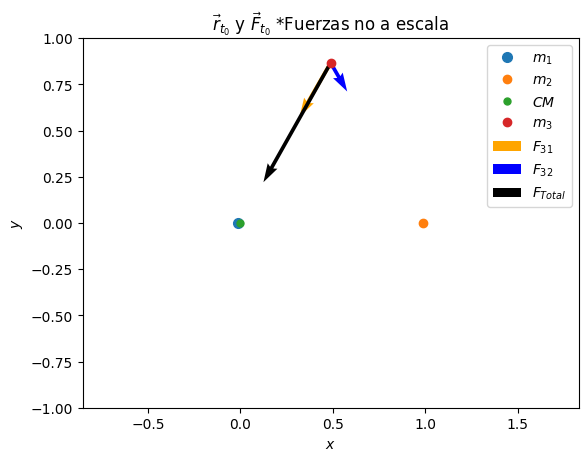

In [ ]:
plt.plot(-m2, 0, "o", label = "$m_1$", markersize = 7)
plt.plot(m1, 0, "o", label = "$m_2$")
plt.plot(0, 0, "o", label = "$CM$", markersize = 5)
plt.plot(r3[0], r3[1], "o", label = "$m_3$")
plt.quiver(r3[0], r3[1], (r1-r3)[0], (r1-r3)[1], scale = 8, color = "orange", label = "$F_{31}$")
plt.quiver(r3[0], r3[1], (r2-r3)[0], (r2-r3)[1], scale = 15, color = "blue", label = "$F_{32}$")
plt.quiver(r3[0], r3[1], f_total[0]*1e19, f_total[1]*1e19, scale = 18, label = "$F_{Total}$")
plt.title("$\\vec{r}_{t_0}$ y $\\vec{F}_{t_0}$ *Fuerzas no a escala")
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.legend()
plt.axis("equal")
plt.ylim(-1,1)
plt.show()

In [ ]:
sistema = [
    dict(m = m1, r = r1, v = [0,-m2, 0]),
    dict(m = m2, r = r2, v = [0,m1, 0]),
    dict(m = m3, r = r3, v = [-np.sin(np.pi/3), np.cos(np.pi/3), 0]),
]

t = np.linspace(0,5*np.pi,1000)
rs, vs, rps, vps, cuadraturas = mc.ncuerpos_solucion(sistema, t)

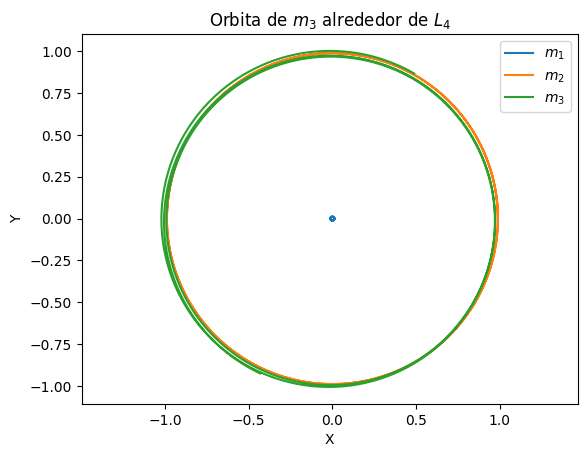

In [ ]:
for i in range(3):
  plt.plot(rps[i][:,0], rps[i][:,1], label = f"$m_{i+1}$")

plt.title('Orbita de $m_3$ alrededor de $L_4$')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.axis("equal")
plt.show()



---



**6. El Virial.** En un sistema de $n$ cuerpos, la fuerza que actua sobre $m_i$ es $F_i$. Muestre que:

\begin{equation}
\frac{1}{2}\ddot{I} = 2T + \sum_i \vec{r_i} \cdot \vec{F_i}
\end{equation}

donde $I$ es el momento de inercia y $T$ es la energía cinética.

> Demuestre que el virial de un sistema de N cuerpos es igual a su energía potencial y a partir de allí deduzca la identidad de Lagrange-Jacobi. ¿Qué interpretación permite dicha identidad?

> Finalmente, deduzca e interprete el teorema del virial.

En un sistema de *N-cuerpos*, podemos utilizar el momento de inercia como indicador de la estabilidad del sistema.

$$I=\sum_i m_ir_i^2$$

En especial, si $t\to \infty\, \wedge \, I\to \infty$ el sistema no se encontrará ligado. Por el contrario, si $t\to \infty\, \wedge \, I\to 0$ el sistema colapsa. Para conocer estas tendencias del comportamiento de $I$, conocer su tasa de variación temporal resulta ser más útil.

$$\dot{I}=2\sum_i m_i(\vec{r_i}\cdot \dot{\vec{r_i}})$$

Para que el sistema se encuentre en equilibrio, lo ideal es que $\dot{I}$ tenga un comportamiento acotado para que el valor de $I$ no explote o se reduzca al cero. Para conocer este comportamiento acotado, podemos proceder similarmente y conocer la tasa de variación de $\dot{I}$.

$$\ddot{I}=2\sum_i m_i(\dot{r_i}^2+\vec{r_i}\cdot \ddot{\vec{r_i}})=\sum_i m_i\dot{r_i}^2 + \sum_i \vec{r_i}\cdot m_i\ddot{\vec{r_i}}$$

$$K=\frac{1}{2}\sum_i m_i\dot{r_i}^2 \hspace{2cm}m_i\ddot{\vec{r_i}}=\vec{F_i}$$

$$\frac{1}{2}\ddot{I}=2K+\sum_i \vec{r_i} \cdot \vec{F_i}$$



Nos centraremos ahora en resolver el termino que involucra la fuerza. Desde la mecánica newtoniana, conocemos que la fuerza gravitacional es una fuerza conservativa por lo que tiene asociada una función potencial.

$$\vec{F_i}=-\vec{\nabla}U_i$$

Mediante el teorema de funciones homogeneas de *Euler*, nos damos cuenta que el potencial $U$ es una función homogenea de grado $k=-1$. Esto nos permite hacer la siguiente reescritura

$$\vec{r_i}\cdot \vec{\nabla}U_i=kU_i=-U_i$$

Concluimos por lo anterior,

$$\sum_i \vec{r_i} \cdot \vec{F_i} = -\sum_i \vec{r_i} \cdot \vec{\nabla}U_i=\sum_i U_i=U$$

Podemos reescribir la expresión para $\ddot{I}$ de la siguiente forma

$$\frac{1}{2}\ddot{I}=2K+U=K+E$$

La anterior, es la idendidad de *Lagrange - Jacobi*. Esta nos permite entender facilmente la evolución de la estabilidad de un sistema de *N-cuerpos* a partir de las energías cinéticas y potenciales del sistema.

Puesto que no se desea que cuando $t\to \infty$, se obtenga $I\to \infty$ o $I\to 0$ si no que se mantenga un valor masomenos acotado, entonces $\dot{I}$ debe ser también acotado y masomenos constante. Si se desea que $\dot{I}\simeq cte$ entonces $\ddot{I}\simeq 0$; este valor alrededor de cero indica que está acotado pero su promedio puede considerarse cero

Ya vimos que el valor de $\ddot{I}$ se encuentra relacionado con los valores de la energía cinética y potencial del sistema, pero estas son cantidades que varían, por lo que la clave es entenderse desde el promedio de estas cantidades.

$$\langle \frac{1}{2}\ddot{I} \rangle = 0$$

$$0=\langle2K\rangle + \langle U\rangle$$

Esto es lo que se conoce como el *Teorema del Virial* para un sistema virializado. Si el sistema se encuentra en equilibrio a largo plazo, se satisface que $$\langle 2K\rangle = -\langle U\rangle$$

En pocas palabras, el equilibrio del sistema de *N-cuerpos* puede pensarse a tráves de un equilibrio de sus energías en forma del virial.





---



**7. El virial en la práctica.** Nos proponemos evaluar las condiciones del teorema del virial en el sistema solar.  Para ello es necesario calcular la energía cinética, la energía potencial y la energía total del sistema por un tiempo prolongado.

1. Elija una fecha inicial arbitraria, calcule las posiciones y velocidades del Sol, Júpiter y Saturno a lo largo de 100 años en intervalos de 1 mes.
2. Calcule la energía cinética (K), la energía potencial (U) y la energía total del sistema en todos los tiempos anteriores. ¿Qué observa? Explique.
3. En el tiempo inicial, calcule las fuerzas que siente cada cuerpo y use la fórmula original del virial para V=∑ rᵢ⋅ Fᵢ para calcular su valor.  Compárelo con el valor de la energía potencial en ese tiempo inicial ¿Qué observa? Explique.
4. Encuentre el promedio de K, U y E.  ¿Se cumple el teorema del virial para el sistema Sol, Júpiter y Saturno?

In [ ]:
planets_id = np.array([10, 599, 699])
planets = np.array(['Sol', 'Jupiter', 'Saturno'])

spice.furnsh('gm_de440.tpc')
m_planets = np.zeros(3)
for i in range(3):
  m_planets[i] = spice.bodvrd(f"{planets_id[i]}","GM",1)[1][0]*1e9/constants.G.value

r_planets, v_planets = consultar_vectores(planets_id, '30d')
P_planets, L_planets, K_planets, U_sistem = energias(m_planets, r_planets, v_planets)

In [ ]:
t_list = np.arange(0,1206)

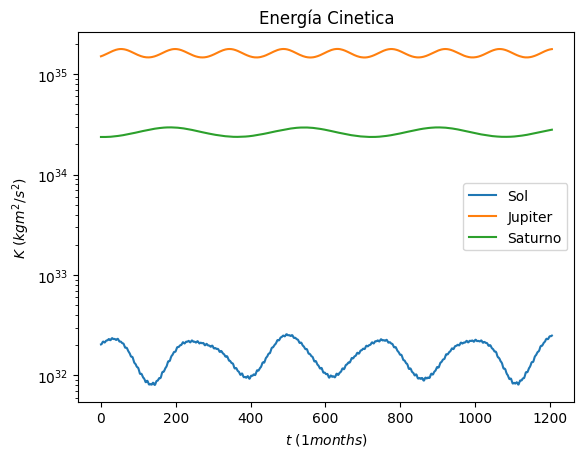

In [ ]:
for i in range(3):
  plt.plot(t_list, K_planets[i], label = planets[i])

plt.legend()
plt.title("Energía Cinetica")
plt.ylabel("$K$ $(kgm^2 /s^2)$")
plt.xlabel("$t$ ($1 months$)")
plt.yscale("log")

Text(0.5, 0, '$t$ ($1 months$)')

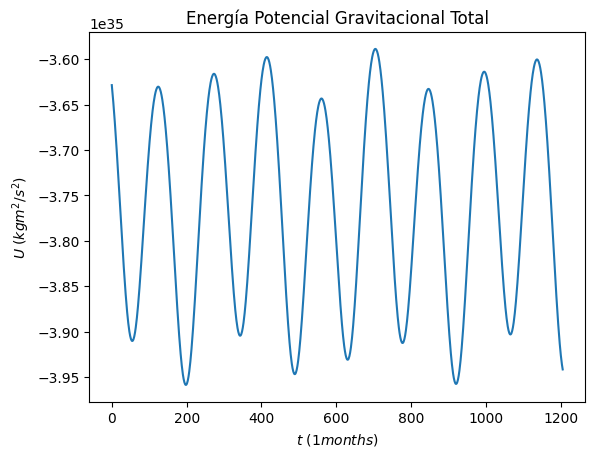

In [ ]:
plt.plot(t_list, U_sistem)
plt.title("Energía Potencial Gravitacional Total")
plt.ylabel("$U$ $(kgm^2 /s^2)$")
plt.xlabel("$t$ ($1 months$)")

Text(0, 0.5, '$E$ (Joules)')

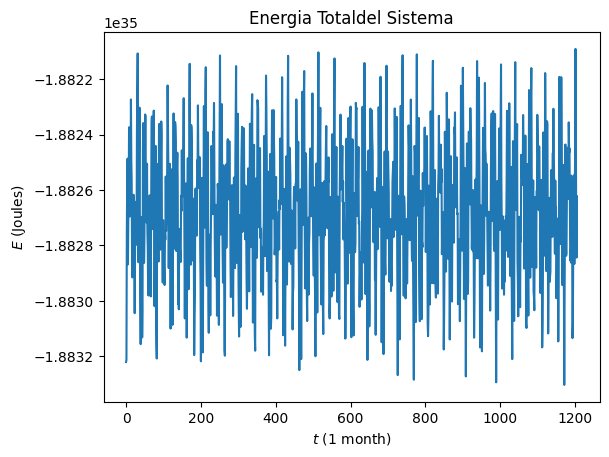

In [ ]:
K_tot = np.sum(K_planets, axis = 0)

plt.plot(t_list, (K_tot + U_sistem))
plt.title("Energia Totaldel Sistema")
plt.xlabel("$t$ (1 month)")
plt.ylabel("$E$ (Joules)")

In [ ]:
def fuerzas(r, m):
  fs = []
  for i in range(len(m)):
    f_i = 0
    for j in range(len(m)):
      if i != j:
        r_ij = r[i]-r[j]
        mu_j = constants.G.value*m[j]
        f_i -= (mu_j/np.linalg.norm(r_ij)**3)*r_ij
    fs.append(f_i*m[i])
  return np.array(fs)

In [ ]:
F_planets = fuerzas(r_planets, m_planets)

V_planets = 0
for i in range(3):
  V_planets += np.sum(r_planets[i]*F_planets[i], axis = 1)

In [ ]:
pd.DataFrame([V_planets[0], U_sistem[0]], index = ["V", "U"], columns = ["Joules"])

,Joules
V,-9.631759e+30
U,-3.628636e+35


In [ ]:
K_mean = np.mean(K_tot)
U_mean = np.mean(U_sistem)
E_mean = np.mean(K_tot + U_sistem)

In [ ]:
pd.DataFrame([K_mean, U_mean, E_mean], index = ["<K>", "<U>", "<E>"], columns = ["Joules"])

,Joules
<K>,1.882885e+35
<U>,-3.765569e+35
<E>,-1.882683e+35




---



**8. Simulación de $N$ cuerpos.** Gliese 667-C es un sistema planetario con 5 planetas descubiertos. Consulte las propiedades de dicho sistema (masas, radios, etc.) y desarrolle:

> a. Elija unas condiciones iniciales y un conjunto de unidades canónicas apropiados, e integre las ecuaciones de movimiento, de forma que el sistema se mantenga estable (suponga que la estrella central se encuentra en reposo en el origen).

> b. Calcule la posición del centro de masas.

> c. Calcule el momentum angular total del sistema.

> d. Encuentre el plano invariante del sistema.

In [ ]:
g_sistem = np.array([f"GJ 667C {i}" for i in ["", "b", "c", "e", "f", "g"]])
m_gsis = np.array([345.6987, 0.018, 0.012, 0.008, 0.008, 0.014]) #Masas
a_gsis = np.array([0, 0.0505, 0.125, 0.156, 0.213, 0.549])*10 #Distancias a la estrella

In [ ]:
pd.DataFrame(np.transpose([m_gsis, a_gsis]), columns = ["M (M_Jup)", "a (0.1 AU)"], index = g_sistem)

,M (M_Jup),a (AU)
GJ 667C,345.6987,0.000
GJ 667C b,0.0180,0.505
GJ 667C c,0.0120,1.250
GJ 667C e,0.0080,1.560
GJ 667C f,0.0080,2.130
GJ 667C g,0.0140,5.490


El conjunto de coordenadas canónicas que utilizaremos será el siguiente de modo que $G=1$ en el nuevo sistema

$$[M]=M_{Jup}\hspace{1cm}[L]=0.1\,AU\hspace{1cm} [T]\simeq 59.74 \,d$$

Tomando la distancia a la que se encuentra cada planeta de su estrella, sus posiciones fueron calculadas de forma aleatoria en Coordenadas Esféricas. Esto quiere decir que los planetas se colocaron sobre esferas de radios $a$ respectivos; se consideró que estuvieran aproximadamente sobre el mismo plano por lo que se restringió $\frac{5\pi}{12}<\theta<\frac{7\pi}{12}$.

La magnitud de velocidades se calculó de acuerdo a la ***tercera ley de Kepler***. Luego las componentes de velocidad vectorial se calcularon de forma aleatoria siguiendo las Coordenadas Esfericas.

Todas estas consideraciones se dan con el fin de pensar el sistema como un sistema planetario estable en lugar de un sistema aleatorio de *N-cuerpos*

In [ ]:
#Posicion aleatoria de los planetas en Coordenadas Esfericas
phi = np.random.uniform(0,2*np.pi, 6)
theta = np.random.uniform(5*np.pi/12, 7*np.pi/12, 6)
r_gsis = np.transpose(a_gsis*np.array([np.cos(phi)*np.sin(theta), np.sin(theta)*np.sin(phi), np.cos(theta)]))

#Velocidades aleatorias de los planetas en Coordenadas Esfericas
v_gsis = np.zeros((6,3), dtype = object)
for i in range(5):
  v_gsis[i+1] = np.sqrt(m_gsis[0]/a_gsis[i+1])*np.array(
      [np.cos(phi[i+1]) * np.cos(theta[i+1])**2 - np.sin(phi[i+1]) * np.sin(theta[i+1])**2,
       np.sin(phi[i+1]) * np.cos(theta[i+1])**2 + np.cos(phi[i+1]) * np.sin(theta[i+1])**2,
       -np.sin(theta[i+1])*np.cos(theta[i+1])])

pd.DataFrame(np.concatenate((r_gsis, v_gsis), axis = 1), columns = ["X", "Y", "Z","Vx", "Vy", "Vz"], index = g_sistem)

,X,Y,Z,Vx,Vy,Vz
GJ 667C,0.0,-0.0,-0.0,0,0,0
GJ 667C b,-0.467742,-0.175874,-0.072878,8.506566,-24.171699,3.736254
GJ 667C c,1.035765,0.695011,0.081549,-9.167985,13.789955,-1.082621
GJ 667C e,1.502494,0.416426,0.051967,-3.955623,14.333998,-0.49562
GJ 667C f,2.066057,-0.489933,0.168151,2.998434,12.300361,-1.002587
GJ 667C g,4.206588,-3.482099,0.565424,5.071128,5.994228,-0.812923


In [ ]:
#Centro de masa
r_cm = np.zeros(3)
for i in range(6):
  r_cm += r_gsis[i]*m_gsis[i]

r_cm = r_cm/np.sum(m_gsis)
pd.DataFrame(r_cm, index = ["X", "Y", "Z"], columns = ["R_CM"])

,R_CM
X,0.000097
Y,-0.000261
Z,0.000054


In [ ]:
#Solución Numerica
sistema = [dict(m = m_gsis[i], r = r_gsis[i], v = v_gsis[i]) for i in range(6)]
t = np.linspace(0,5,1000)

rs, vs, rps, vps, cuadraturas = mc.ncuerpos_solucion(sistema, t) #Algoritmo de Jorge

In [ ]:
P_gsis = []
L_gsis = []

for i in range(6): #Momentum Lineal, Angular y Energia Cinetica en sus tres componentes para cada instante
  P_gsis.append(m_gsis[i]*vps[i])
  L_gsis.append(np.cross(rps[i], P_gsis[i], axis = 1))

P_gsis = np.array(P_gsis)
L_gsis = np.array(L_gsis)
L_tot = np.sum(L_gsis, axis = 0)

In [ ]:
#Momentum angular del planeta GJ 667C-e
#Puede cambiar el planeta en el indice de L_gsis
pd.DataFrame(L_gsis[3], columns = ["Lx (kg·m²/s)", "Ly (kg·m²/s)", "Lz (kg·m²/s)"])

,Lx (kg·m²/s),Ly (kg·m²/s),Lz (kg·m²/s)
0,-0.015604,0.052479,0.173209
1,-0.015604,0.052480,0.173210
2,-0.015604,0.052480,0.173212
3,-0.015605,0.052480,0.173214
4,-0.015605,0.052481,0.173216
...,...,...,...
995,-0.015450,0.052505,0.173207
996,-0.015450,0.052505,0.173207
997,-0.015450,0.052505,0.173208
998,-0.015450,0.052505,0.173208


Text(0, 0.5, '$L$')

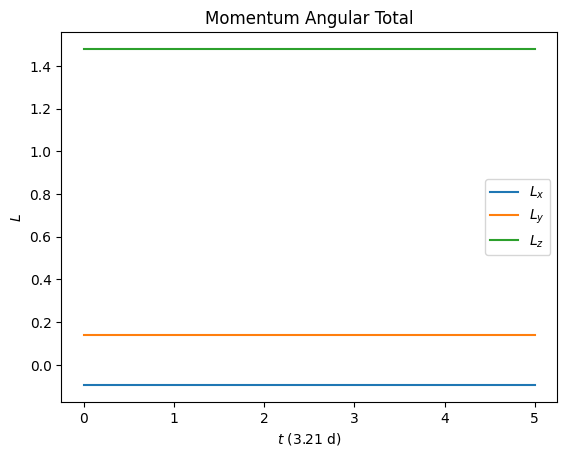

In [ ]:
labels = ["$L_x$", "$L_y$", "$L_z$"]

for i in range(3):
  plt.plot(t, L_tot[:,i], label = labels[i])

plt.legend()
plt.title("Momentum Angular Total")
plt.xlabel("$t$ (3.21 d)")
plt.ylabel("$L$")

Aquí observamos que cada una de las componentes del *Momentum Angular* se mantienen constante a lo largo del tiempo. Comprobamos que esta cantidad se conserva y permite definir el vector normal $\hat{L}$ del *Plano invariante de Laplace*

In [ ]:
#Vector dirección del y magnitud Momentum Angular
pd.DataFrame(cuadraturas["L"]/np.linalg.norm(cuadraturas["L"]), index = ["Lx", "Ly", "Lz"], columns = ["Momentum Angular"])

,Momentum Angular
Lx,0.024253
Ly,0.140458
Lz,0.989789


El plano invariante del sistema es aquel que tiene como vector normal, al momento angular del sistema. Desde el calculo vectorial podemos decir que la ecuación del plano es el conjunto de todos los puntos $(x,y,x)$ tal que se satisface

$$x\hat{L_x}+y\hat{L_y}+z\hat{L_z}=0$$

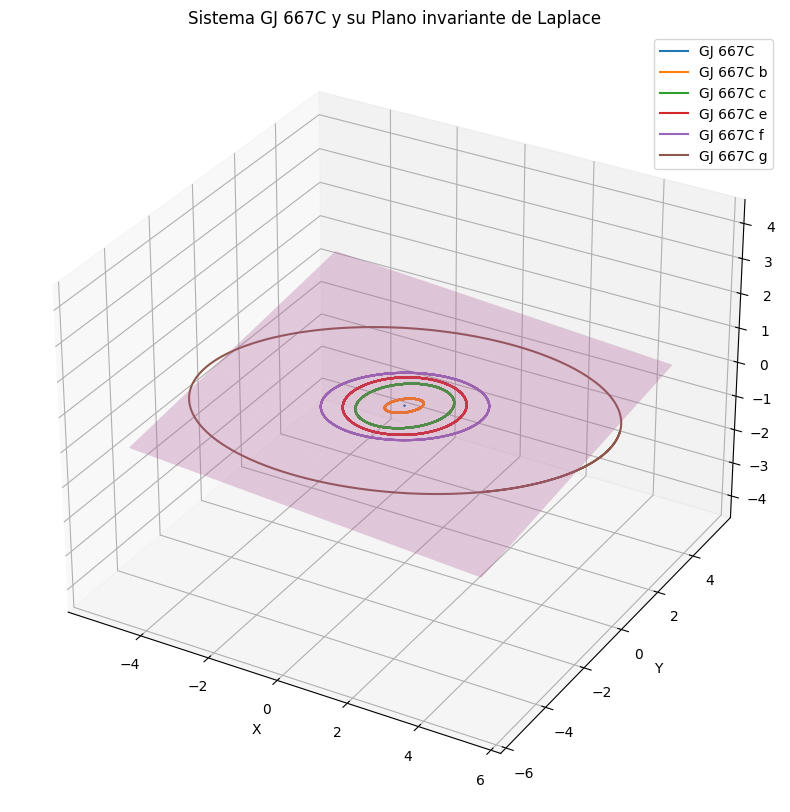

In [ ]:
#Grafico de las orbitas
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')
for i in range(6):
  ax.plot(rps[i,:,0], rps[i,:,1], rps[i,:,2], label=g_sistem[i])

#Plano de Laplace
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x, y)
Z = (L_tot[0,0]*X + L_tot[0,1]*Y)/L_tot[0,2]
ax.plot_surface(X, Y, Z, alpha = 0.3)

ax.set_title('Sistema GJ 667C y su Plano invariante de Laplace')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.legend()
ax.grid(True)
plt.axis("equal")
plt.show()

Con el resultado de la simulación del sistema logramos estabilidad, pues desde un inicio fue pensado como un sistema planetario estable y el calculo de sus posiciones y velocidades, aunque fue aleatorio, siguió un comportamiento deseado.

Esto también lo garantiza el calculo que se hizo del plano invariante del sistema. Debido a que desde un principio se pensó en que fueran aproximadamente coplanares, se observa que pertenecen al plano invariante.



---



**9. Aproximación de un cometa.** Considere una partícula de masa despreciable en el sistema solar (un cometa), que se encuentra a 15 unidades astronómicas del Sol. Estudie numéricamente el movimiento de dicho cuerpo:

1. Considerando los todos los planetas del sistema solar.
2. Despreciando completamente los 4 planetas interiores.
3. Añadiendo las masas de los planetas interiores al Sol. \
Nota: A esto se le conoce como "tirar los planetas dentro del Sol." Léase la sección 9.5 del libro *Fundamentals of celestial mechanics*, J.M.A Danby, segunda edición.

Para este calculo se definen como unidades canónicas del sistema las siguientes


$$[M]=M_{Jup} \hspace{1cm} [L]=1\, AU \hspace{1cm} [T]\simeq 5.17\, y$$

Para el cometa se utilizará el mismo razonamiento sobre la aleatoriedad de la posición y velocidad que en el ejercicio anterior.

La posicion se piensa aleatoria y aproximadamente coplanar sobre una esfera de radio $a=15\,AU$. En cuanto a su velocidad, está si se calcula completamente aleatoria en un rango entre cero y la velocidad que tendría en una orbita circular.

El proceder considera simular las orbitas por un tiempo de $\sim 60\,y$, con un tamaño de paso de $\sim 5\,d$.


In [4]:
!wget https://naif.jpl.nasa.gov/pub/naif/generic_kernels/pck/gm_de440.tpc #Kernel de Spice

--2023-09-04 19:17:16--  https://naif.jpl.nasa.gov/pub/naif/generic_kernels/pck/gm_de440.tpc
Resolving naif.jpl.nasa.gov (naif.jpl.nasa.gov)... 137.78.232.95
Connecting to naif.jpl.nasa.gov (naif.jpl.nasa.gov)|137.78.232.95|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 12708 (12K) [text/plain]
Saving to: ‘gm_de440.tpc’

gm_de440.tpc        100%[===================>]  12.41K  --.-KB/s    in 0s      

2023-09-04 19:17:16 (184 MB/s) - ‘gm_de440.tpc’ saved [12708/12708]



In [59]:
planets_id = np.array([10] + [i for i in range (199,900,100)])
planets = np.array(["Sol","Mercurio", "Venus", "Tierra", "Marte", "Jupiter", "Saturno", "Urano", "Neptuno", "Cometa"])

In [60]:
#Datos de Spice
spice.furnsh('gm_de440.tpc')
m_planets = np.zeros(10) #Ultima posición es la masa del cometa
m_jup = spice.bodvrd(f"{planets_id[5]}","GM",1)[1][0] *1e9/constants.G.value
m_planets[9] = 2e14/m_jup #Approx Masa del Cometa Halley

for i in range(9):
  m_planets[i] = spice.bodvrd(f"{planets_id[i]}","GM",1)[1][0] *1e9/(constants.G.value*m_jup)

In [61]:
#Posicion y velocidad aleatoria del cometa
phi = np.random.uniform(0,2*np.pi)
theta = np.random.uniform(5*np.pi/12, 7*np.pi/12)
r_comet = 15*np.array([np.cos(phi)*np.sin(theta), np.sin(theta)*np.sin(phi), np.cos(theta)])
v_comet = np.random.uniform(0, np.sqrt(m_planets[0]/15)) * np.array(
      [np.cos(phi) * np.cos(theta)**2 - np.sin(phi) * np.sin(theta)**2,
       np.sin(phi) * np.cos(theta)**2 + np.cos(phi) * np.sin(theta)**2,
       -np.sin(theta)*np.cos(theta)])

#Se da en coordenadas esfericas

In [62]:
#Posiciones y velocidades de los planetas con Horizons
r_planets = np.zeros(10, dtype = object)
v_planets = np.zeros(10, dtype = object)

for i in range(9):
  objeto = Horizons(id = planets_id[i], location='@0', epochs={'start':'2000-01-01', 'stop':'2000-01-01 00:00:01', 'step': "1d"}).vectors().to_pandas()
  r_objeto = objeto[['x', 'y', 'z']].values.flatten()
  v_objeto = objeto[['vx', 'vy', 'vz']].values.flatten()/(0.000523)
  r_planets[i] = r_objeto
  v_planets[i] = v_objeto

In [63]:
r_planets[9] = r_comet
v_planets[9] = v_comet

In [64]:
#Solucion Numerica
t = np.linspace(0,12, 1000)
sistema = [dict(m = m_planets[i], r = r_planets[i], v = v_planets[i]) for i in range(10)]

rs, vs, rps, vps, cuadraturas = mc.ncuerpos_solucion(sistema, t) #Algoritmo de Jorge

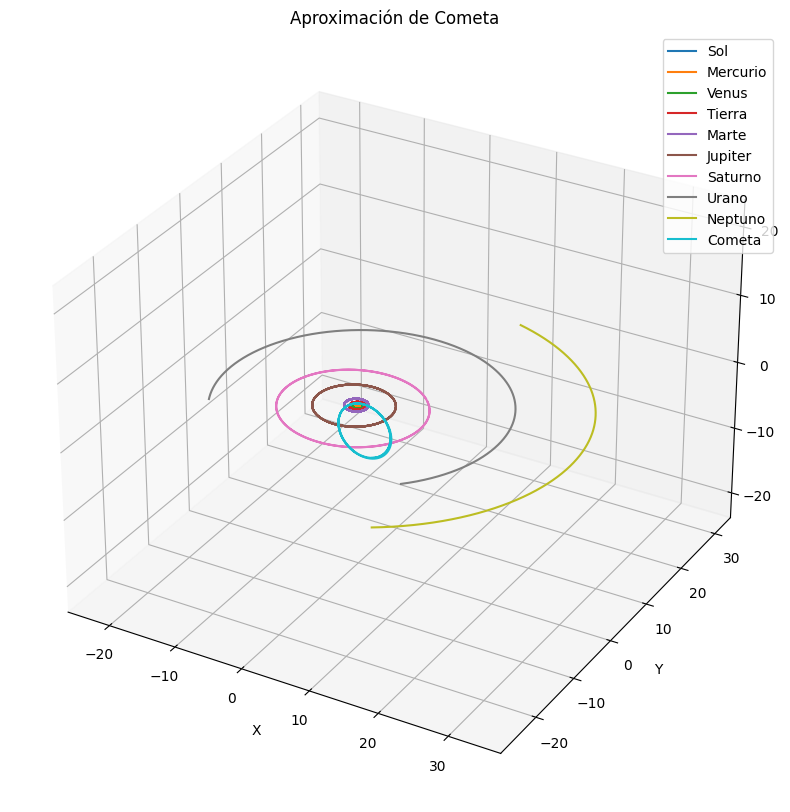

In [65]:
#Grafico de las orbitas
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')
for i in range(10):
  ax.plot(rps[i,:,0], rps[i,:,1], rps[i,:,2], label = planets[i])

ax.set_title('Aproximación de Cometa')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.legend()
ax.grid(True)
plt.axis("equal")
plt.show()

#**Sin Planetas Interiores**

In [68]:
#Eliminando los planetas interiores
planets_id_ext = np.array([10] + [i for i in range (599,900,100)])
planets_ext = np.array(["Sol", "Jupiter", "Saturno", "Urano", "Neptuno", "Cometa"])

m_planets_ext = np.delete(m_planets, [i for i in range(1,5)])
r_planets = np.delete(r_planets, [i for i in range(1,5)])
v_planets = np.delete(v_planets, [i for i in range(1,5)])

In [69]:
#Solucion Numerica
sistema = [dict(m = m_planets_ext[i], r = r_planets[i], v = v_planets[i]) for i in range(6)]
rs, vs, rps, vps, cuadraturas = mc.ncuerpos_solucion(sistema, t)

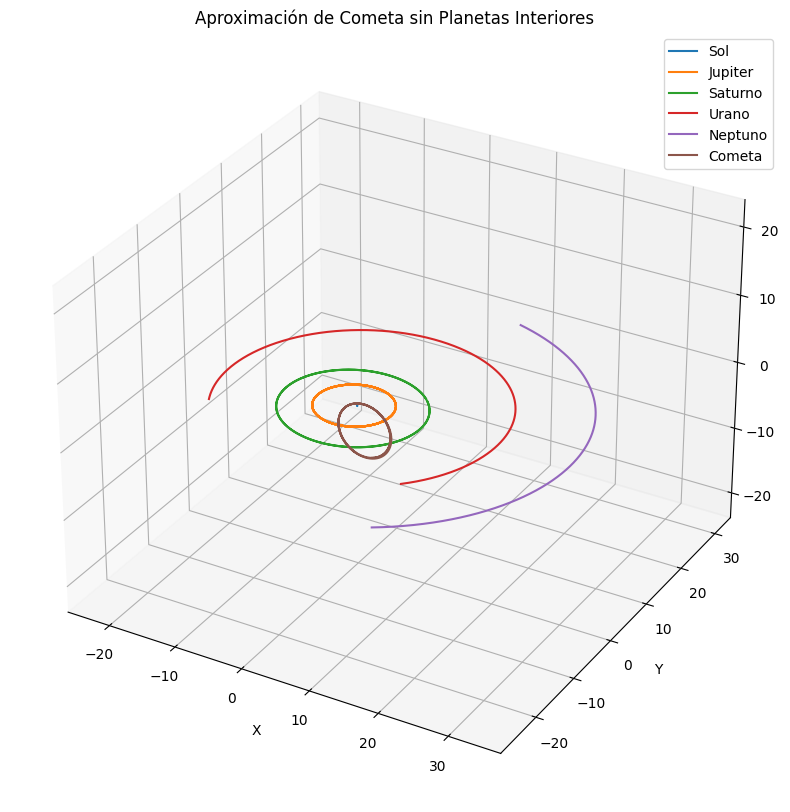

In [70]:
#Grafico de las orbitas
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')
for i in range(6):
  ax.plot(rps[i,:,0], rps[i,:,1], rps[i,:,2], label = planets_ext[i])

ax.set_title('Aproximación de Cometa sin Planetas Interiores')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.legend()
ax.grid(True)
plt.axis("equal")
plt.show()

#**Tirando Planetas**

In [71]:
m_planets_ext[0] = np.sum(m_planets[:5]) #Añadiendo la masa de los planetas interiores a la masa del Sol

#Solucion Numerica
sistema = [dict(m = m_planets_ext[i], r = r_planets[i], v = v_planets[i]) for i in range(6)]
rs, vs, rps, vps, cuadraturas = mc.ncuerpos_solucion(sistema, t)

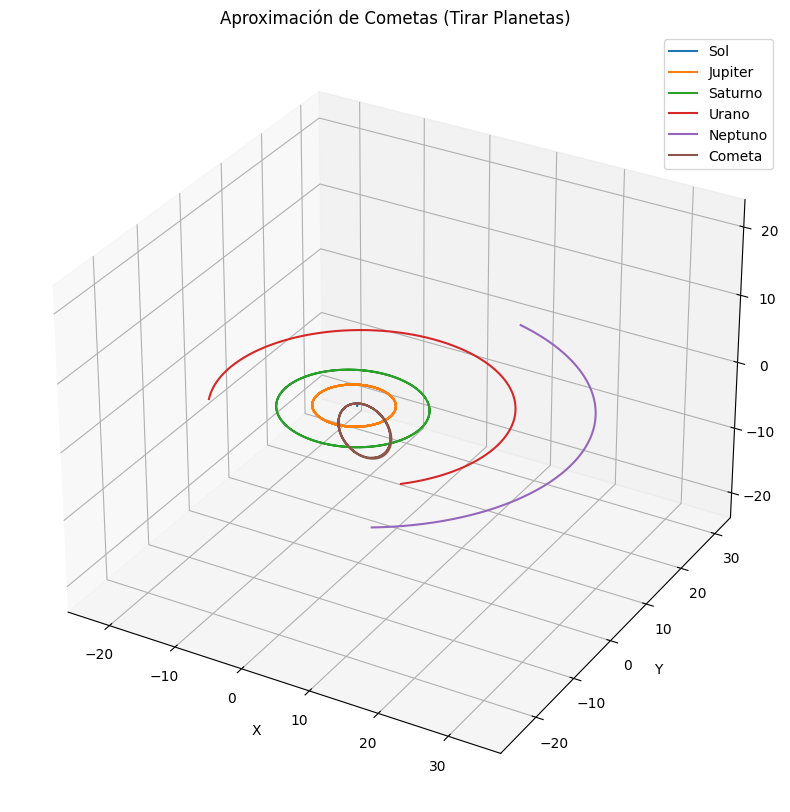

In [72]:
#Grafico de las orbitas
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')
for i in range(6):
  ax.plot(rps[i,:,0], rps[i,:,1], rps[i,:,2], label = planets_ext[i])

ax.set_title('Aproximación de Cometas (Tirar Planetas)')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.legend()
ax.grid(True)
plt.axis("equal")
plt.show()

#**Discusión**

De acuerdo con la discusión planteada por Danby, la mayor contribución al movimiento del cometa proviene de los efectos gravitacionales de Jupiter y del Sol.

Cuando se observa la aproximación del cometa en todas las situaciones consideradas, a simple vista no se aprecian cambios en la órbita de este.

Además de esto, podríamos pensar en eliminar a Urano y Neptuno pues la posición planteada por el cometa se encuentra en una orbita inferior a la de estos planetas y su efecto gravitacional puede ser despreciable.

En conclusión, y reafirmando lo discutido por Danby, la evolución orbital de un cometa en aproximación se da principalmente por efectos de los gigantes y del Sol. Esto solamente es cierto cuando la orbita del cometa no realiza acercamientos a otros planetas que si puedan desviar su orbita.